In [1]:

%pip install --upgrade numpy pandas matplotlib seaborn scikit-learn --quiet

import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


# Data Preparation


In [39]:
# Constants
DATA_DIR = "../dataset/feature_selection/"
DATASET = "patient_embeddings_scBERT"
MODEL_DIR = "../models/classification/" + DATASET + "/"

In [40]:
# load data
df = pd.read_csv(DATA_DIR + DATASET + ".csv")
df.head()

,Survival,Death,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,245.0,1.0,-0.446554,0.301162,-0.893672,1.144034,0.070003,-0.879428,0.420583,0.206330,...,-0.550477,-1.035134,-0.887155,0.040835,0.246484,-1.069909,-0.137287,-0.187848,-0.926323,0.358509
1,212.0,1.0,-0.446554,0.301162,-0.893672,1.144034,0.070003,-0.879428,0.420583,0.206330,...,-0.550477,-1.035134,-0.887155,0.040835,0.246484,-1.069909,-0.137287,-0.187848,-0.926323,0.358509
2,31.0,1.0,-0.446554,0.301162,-0.893672,1.144034,0.070003,-0.879428,0.420583,0.206330,...,-0.550477,-1.035134,-0.887155,0.040835,0.246484,-1.069909,-0.137287,-0.187848,-0.926323,0.358509
3,215.0,1.0,-0.446554,0.301162,-0.893672,1.144034,0.070003,-0.879428,0.420583,0.206330,...,-0.550477,-1.035134,-0.887155,0.040835,0.246484,-1.069909,-0.137287,-0.187848,-0.926323,0.358509
4,393.0,0.0,-0.423971,0.309481,-0.891850,1.150430,0.061040,-0.865298,0.414424,0.194185,...,-0.560398,-1.029940,-0.898944,0.035926,0.246195,-1.081219,-0.138370,-0.201121,-0.928789,0.367739


In [41]:
print("shape: ", df.shape)
print("columns: ", df.columns)

shape:  (159, 770)
columns:  Index(['Survival', 'Death', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '758', '759', '760', '761', '762', '763', '764', '765', '766', '767'],
      dtype='object', length=770)


In [42]:
#  check for missing values
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

Survival    0
Death       0
0           0
1           0
2           0
           ..
763         0
764         0
765         0
766         0
767         0
Length: 770, dtype: int64

In [43]:
# split the data into features and target

X = df.drop(["Death", "Survival"], axis=1)
print("features: ", X.shape)
y_death = df["Death"]
print("target death: ", y_death.shape)
y_survival = df["Survival"]
print("target survival: ", y_death.shape)

features:  (150, 768)
target death:  (150,)
target survival:  (150,)


# Classification Deaths


In [44]:
# split the data into train and test
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(
    X, y_death, test_size=0.2, random_state=1121
)

In [45]:
%pip install --upgrade xgboost lightgbm --quiet

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

models = [
    ("SVM", SVC(random_state=42, C=1.0e-03, kernel="linear", gamma="scale")),
    (
        "RF",
        RandomForestClassifier(
            random_state=42,
            n_estimators=100,
            criterion="gini",
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features="sqrt",
            n_jobs=-1,
        ),
    ),
    (
        "XGB",
        XGBClassifier(
            random_state=42,
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            n_jobs=-1,
        ),
    ),
    (
        "LGBM",
        LGBMClassifier(
            random_state=42,
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            n_jobs=-1,
        ),
    ),
    (
        "KNN",
        KNeighborsClassifier(n_neighbors=3, weights="uniform", algorithm="ball_tree"),
    ),
    # ("NB", GaussianNB()),
    (
        "ADA",
        AdaBoostClassifier(
            random_state=42, n_estimators=50, learning_rate=0.1, algorithm="SAMME"
        ),
    ),
]

Starting training for SVM...
Accuracy 0.6333333333333333
F1_Score 0.49115646258503404
Precision 0.4011111111111111
Recall 0.6333333333333333
roc-auc 0.5


d:\Project\llm-guided-classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


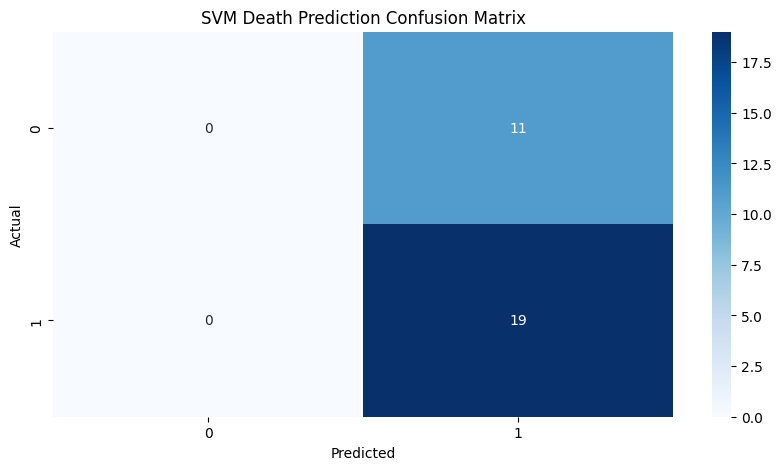

Starting training for RF...
Accuracy 0.6333333333333333
F1_Score 0.49115646258503404
Precision 0.4011111111111111
Recall 0.6333333333333333
roc-auc 0.5


d:\Project\llm-guided-classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


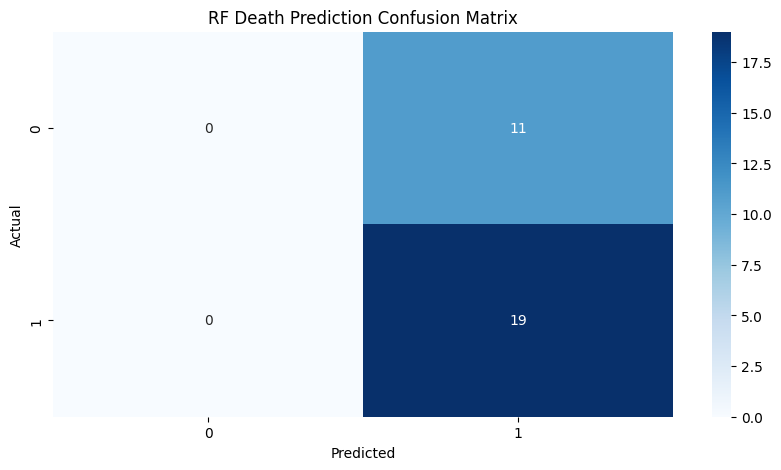

Starting training for XGB...
Accuracy 0.6333333333333333
F1_Score 0.49115646258503404
Precision 0.4011111111111111
Recall 0.6333333333333333
roc-auc 0.5


d:\Project\llm-guided-classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


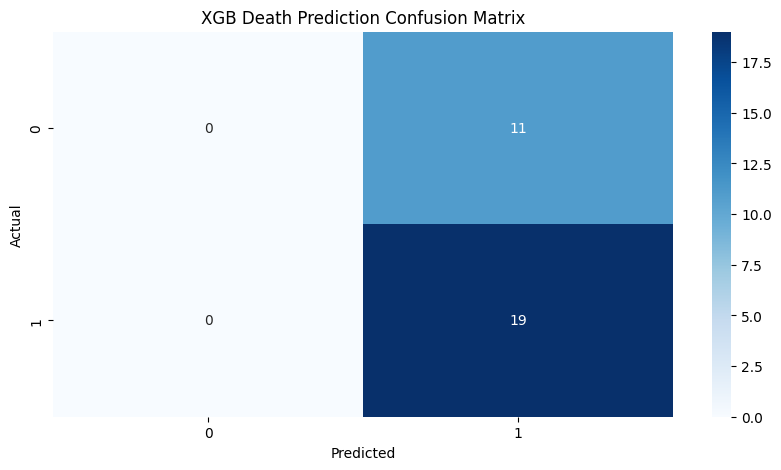

Starting training for LGBM...
[LightGBM] [Info] Number of positive: 80, number of negative: 40
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2304
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

d:\Project\llm-guided-classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


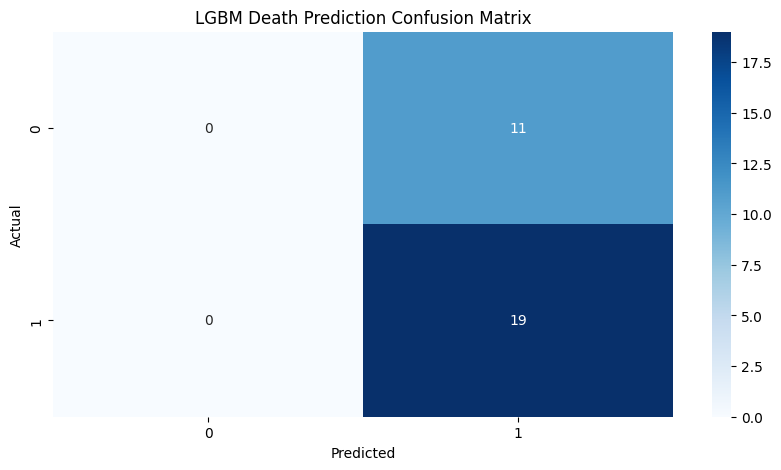

Starting training for KNN...
Accuracy 0.6333333333333333
F1_Score 0.49115646258503404
Precision 0.4011111111111111
Recall 0.6333333333333333
roc-auc 0.5


d:\Project\llm-guided-classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


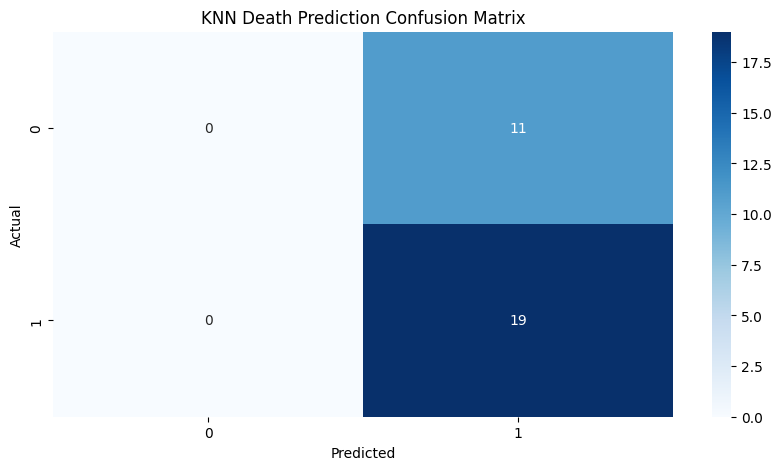

Starting training for ADA...


d:\Project\llm-guided-classification\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
d:\Project\llm-guided-classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy 0.6333333333333333
F1_Score 0.49115646258503404
Precision 0.4011111111111111
Recall 0.6333333333333333
roc-auc 0.5


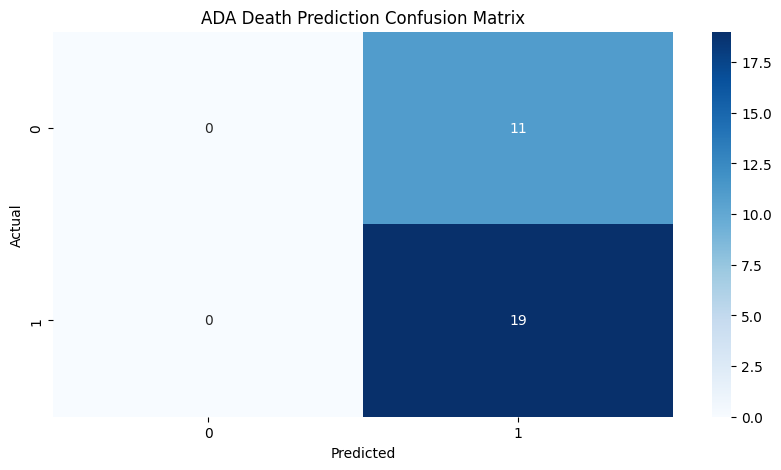

Models and results saved in ../models/classification/patient_embeddings_scBERT/Death/


In [47]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
)

DEATH_MODEL_DIR = MODEL_DIR + "Death/"
# training models
if not os.path.exists(DEATH_MODEL_DIR):
    os.makedirs(DEATH_MODEL_DIR)

metrics = {
    "Accuracy": accuracy_score,
    "F1 Score": f1_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "roc-auc": roc_auc_score,
}

eval_results = {metric: [] for metric in metrics}

for name, model in models:
    print(f"Starting training for {name}...")
    model.fit(X_train_death, y_train_death)

    model_path = os.path.join(DEATH_MODEL_DIR, name + ".pkl")
    y_pred = model.predict(X_test_death)

    Accuracy = accuracy_score(y_test_death, y_pred)
    eval_results["Accuracy"].append(Accuracy)
    print("Accuracy", Accuracy)

    F1_Score = f1_score(y_test_death, y_pred, average="weighted")
    eval_results["F1 Score"].append(F1_Score)
    print("F1_Score", F1_Score)

    Precision = precision_score(y_test_death, y_pred, average="weighted")
    eval_results["Precision"].append(Precision)
    print("Precision", Precision)

    Recall = recall_score(y_test_death, y_pred, average="weighted")
    eval_results["Recall"].append(Recall)
    print("Recall", Recall)

    roc_auc = roc_auc_score(y_test_death, y_pred)
    eval_results["roc-auc"].append(roc_auc)
    print("roc-auc", roc_auc)

    with open(model_path, "wb") as f:
        pickle.dump(model, f)

    # calculate confusion matrix
    cm = confusion_matrix(y_test_death, y_pred)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Death Prediction Confusion Matrix")
    plt.savefig(os.path.join(DEATH_MODEL_DIR, f"{name}_confusion_matrix.png"))
    plt.show()
    plt.close()

results = pd.DataFrame({"Model": [name for name, _ in models]})
for metric_name in metrics:
    results[metric_name] = eval_results[metric_name]

results.to_csv(os.path.join(DEATH_MODEL_DIR, "evaluation_results.csv"), index=False)
print("Models and results saved in {}".format(DEATH_MODEL_DIR))

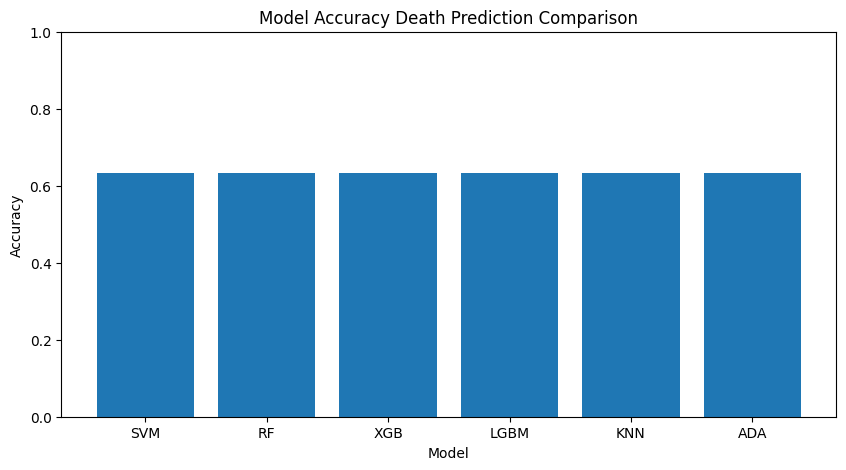

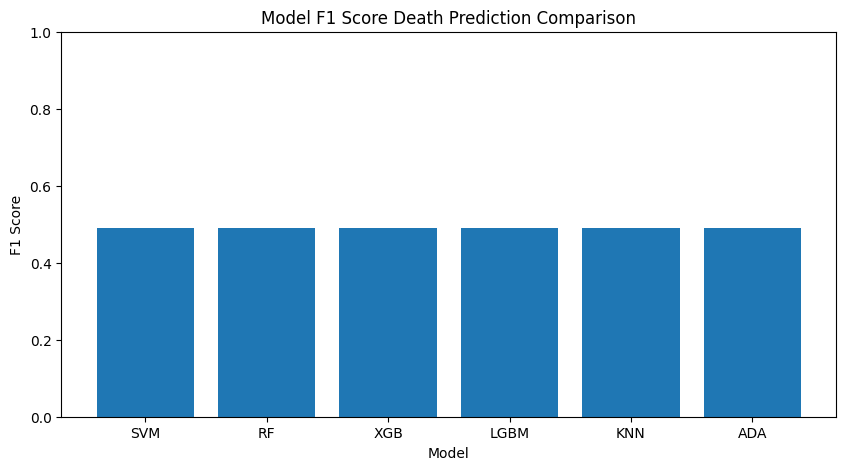

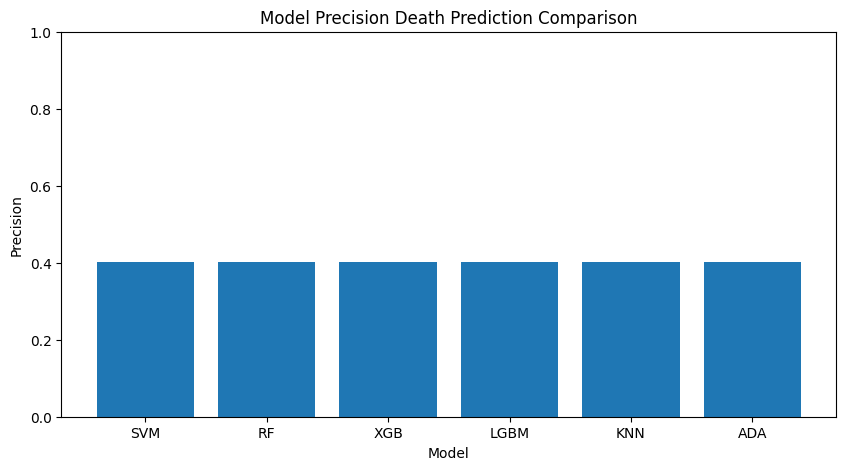

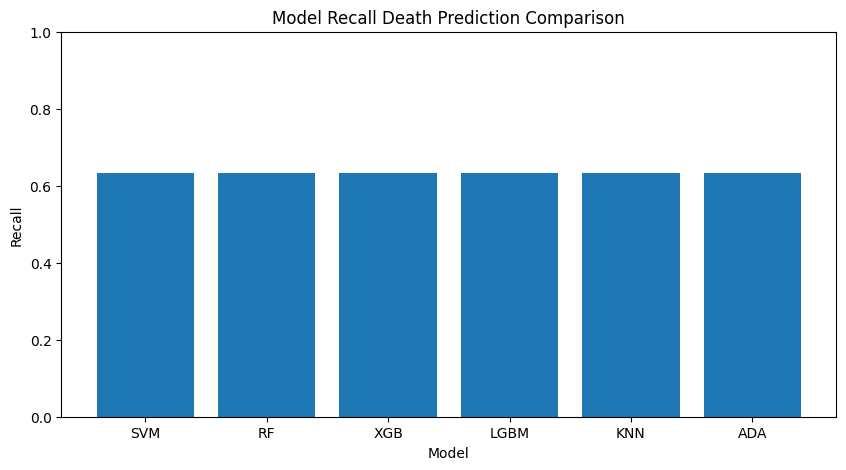

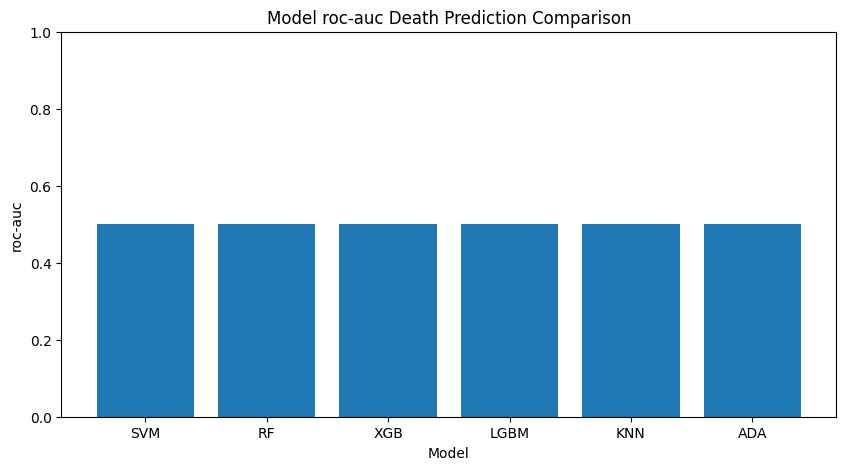

Plots saved in ../models/classification/patient_embeddings_scBERT/Death/


In [48]:
#  display results

for metric_name in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar([name for name, _ in models], eval_results[metric_name])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Model")
    plt.ylabel(metric_name)
    plt.title(f"Model {metric_name} Death Prediction Comparison")
    plt.savefig(os.path.join(DEATH_MODEL_DIR, f"{metric_name}_plot.png"))
    plt.show()
    plt.close()
print("Plots saved in {}".format(DEATH_MODEL_DIR))

# Classification Survival


In [49]:
# split the data into train and test
X_train_survival, X_test_survival, y_train_survival, y_test_survival = train_test_split(
    X, y_survival, test_size=0.2, random_state=1121
)

In [50]:
# models selection for regression

from sklearn.linear_model import ElasticNet, RidgeCV, LinearRegression, LassoCV

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", RidgeCV(cv=5)),
    ("Lasso Regression", LassoCV(cv=5)),
    ("Elastic Net", ElasticNet(alpha=1.0, l1_ratio=0.5)),
]

Starting training for Linear Regression...
Mean Squared Error 328202.55687499995
Mean Absolute Error 429.7683333333333
R2 Score -0.030143843472518972


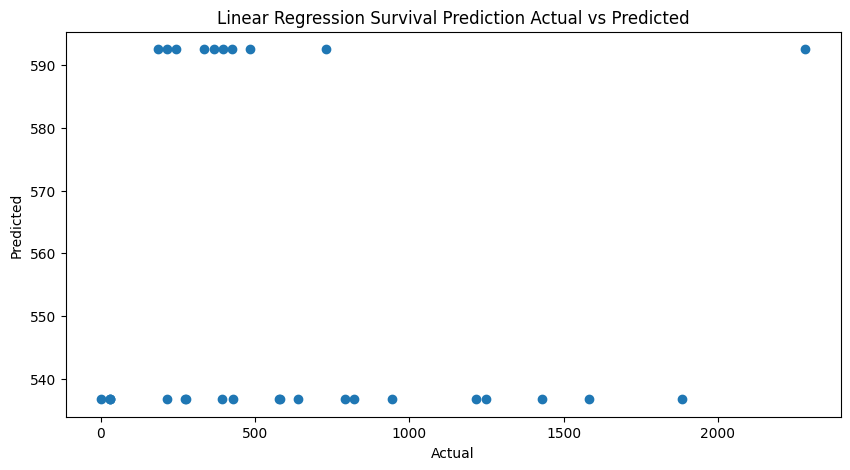

Starting training for Ridge Regression...
Mean Squared Error 326606.0195195426
Mean Absolute Error 425.9559233670457
R2 Score -0.025132721245872958


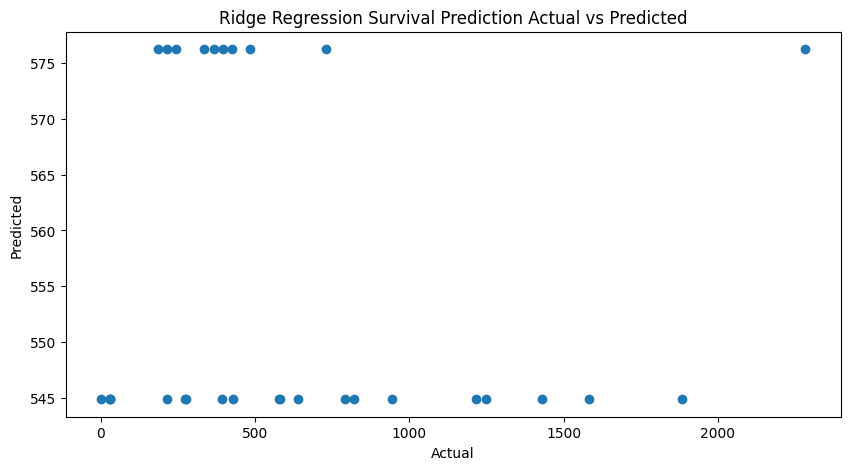

Starting training for Lasso Regression...
Mean Squared Error 328198.6134146143
Mean Absolute Error 429.7596416666668
R2 Score -0.030131465959445825


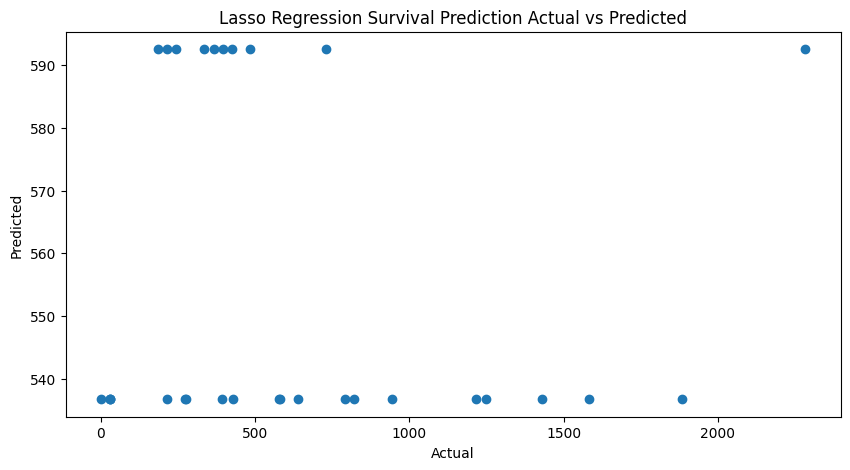

Starting training for Elastic Net...
Mean Squared Error 324952.3705627818
Mean Absolute Error 421.077301054849
R2 Score -0.019942340316815743


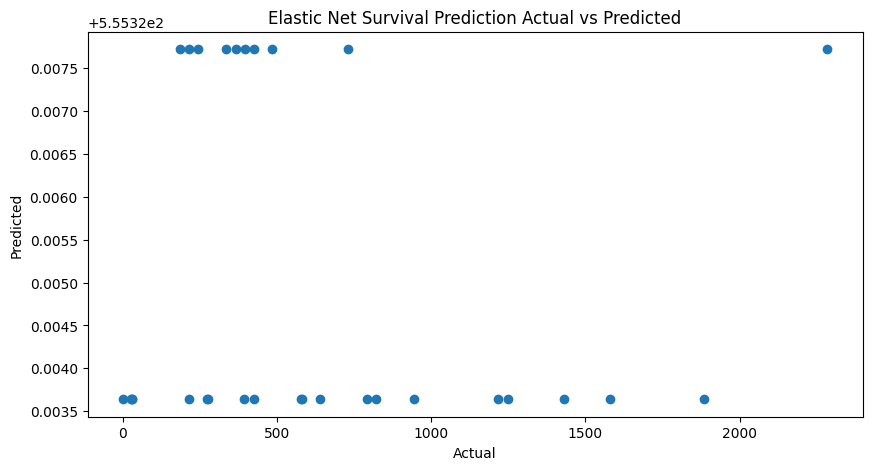

Models and results saved in ../models/classification/patient_embeddings_scBERT/Survival/


In [51]:
# train models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


SURVIVAL_MODEL_DIR = MODEL_DIR + "Survival/"
if not os.path.exists(SURVIVAL_MODEL_DIR):
    os.makedirs(SURVIVAL_MODEL_DIR)

metrics = {
    "Mean Squared Error": mean_squared_error,
    "Mean Absolute Error": mean_absolute_error,
    "R2 Score": r2_score,
}


eval_results = {metric: [] for metric in metrics}

for name, model in models:
    print(f"Starting training for {name}...")
    model.fit(X_train_survival, y_train_survival)

    model_path = os.path.join(SURVIVAL_MODEL_DIR, name + ".pkl")
    y_pred = model.predict(X_test_survival)

    MSE = mean_squared_error(y_test_survival, y_pred)
    eval_results["Mean Squared Error"].append(MSE)
    print("Mean Squared Error", MSE)

    MAE = mean_absolute_error(y_test_survival, y_pred)
    eval_results["Mean Absolute Error"].append(MAE)
    print("Mean Absolute Error", MAE)

    R2 = r2_score(y_test_survival, y_pred)
    eval_results["R2 Score"].append(R2)
    print("R2 Score", R2)

    with open(model_path, "wb") as f:
        pickle.dump(model, f)

    plt.figure(figsize=(10, 5))
    plt.scatter(y_test_survival, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} Survival Prediction Actual vs Predicted")
    plt.savefig(os.path.join(SURVIVAL_MODEL_DIR, f"{name}_actual_vs_predicted.png"))
    plt.show()
    plt.close()


results = pd.DataFrame({"Model": [name for name, _ in models]})
for metric_name in metrics:
    results[metric_name] = eval_results[metric_name]

results.to_csv(os.path.join(SURVIVAL_MODEL_DIR, "evaluation_results.csv"), index=False)
print("Models and results saved in {}".format(SURVIVAL_MODEL_DIR))

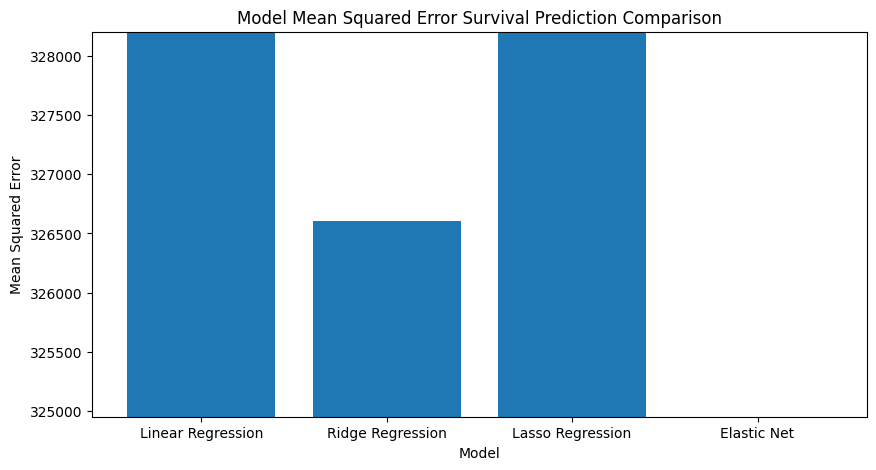

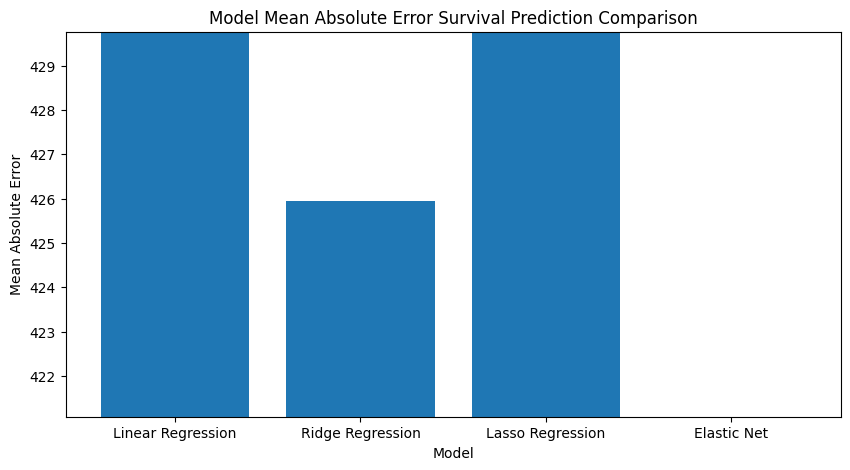

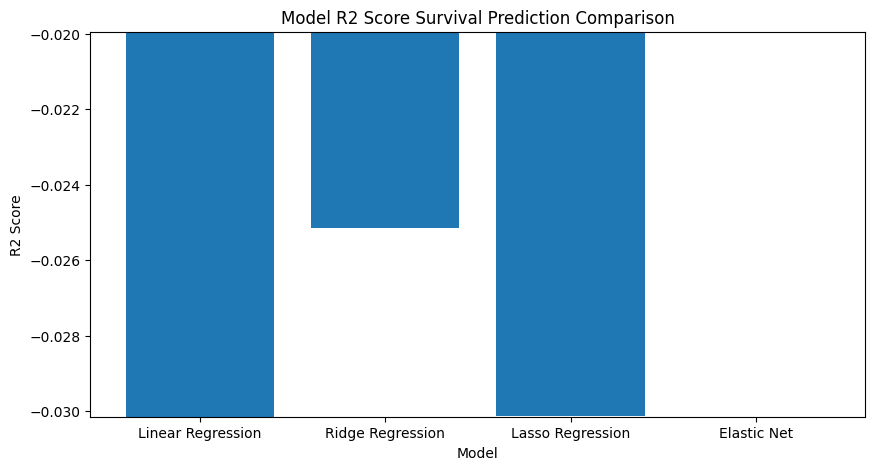

Plots saved in ../models/classification/patient_embeddings_scBERT/Survival/


In [52]:
#  display results

for metric_name in metrics:
    plt.figure(figsize=(10, 5))
    plt.bar([name for name, _ in models], eval_results[metric_name])
    plt.ylim([np.min(eval_results[metric_name]), np.max(eval_results[metric_name])])
    plt.xlabel("Model")
    plt.ylabel(metric_name)
    plt.title(f"Model {metric_name} Survival Prediction Comparison")
    plt.savefig(os.path.join(SURVIVAL_MODEL_DIR, f"{metric_name}_plot.png"))
    plt.show()
    plt.close()
print("Plots saved in {}".format(SURVIVAL_MODEL_DIR))